In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [85]:
data = yf.download('AAPL', start='2010-01-01', end='2020-01-01')
df = pd.DataFrame(data)


[*********************100%%**********************]  1 of 1 completed


In [62]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [64]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,27.579823,27.824672,27.329953,27.586323,25.278394,2.995931e+08
std,14.022295,14.144805,13.920329,14.043239,13.996463,2.352800e+08
min,6.870357,7.000000,6.794643,6.858929,5.798901,4.544800e+07
25%,16.245983,16.345536,16.049285,16.178571,13.874615,1.247008e+08
50%,24.791250,25.069107,24.596251,24.870000,22.387831,2.218420e+08
75%,37.580626,37.985001,37.291876,37.638125,35.422690,4.067637e+08
max,72.779999,73.492500,72.379997,73.412498,71.332909,1.880998e+09


In [6]:
for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)

Open 	-	 0.0
High 	-	 0.0
Low 	-	 0.0
Close 	-	 0.0
Adj Close 	-	 0.0
Volume 	-	 0.0


In [65]:
top_corelated_values = df.corr()
top_corelated_values

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999854,0.999807,0.999661,0.998906,-0.635997
High,0.999854,1.000000,0.999767,0.999831,0.999096,-0.633768
Low,0.999807,0.999767,1.000000,0.999842,0.999102,-0.640046
Close,0.999661,0.999831,0.999842,1.000000,0.999267,-0.637044
Adj Close,0.998906,0.999096,0.999102,0.999267,1.000000,-0.635384
Volume,-0.635997,-0.633768,-0.640046,-0.637044,-0.635384,1.000000


In [67]:
df = df[top_corelated_values.index]
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [86]:
df.shape


(2516, 6)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15044\532747213.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


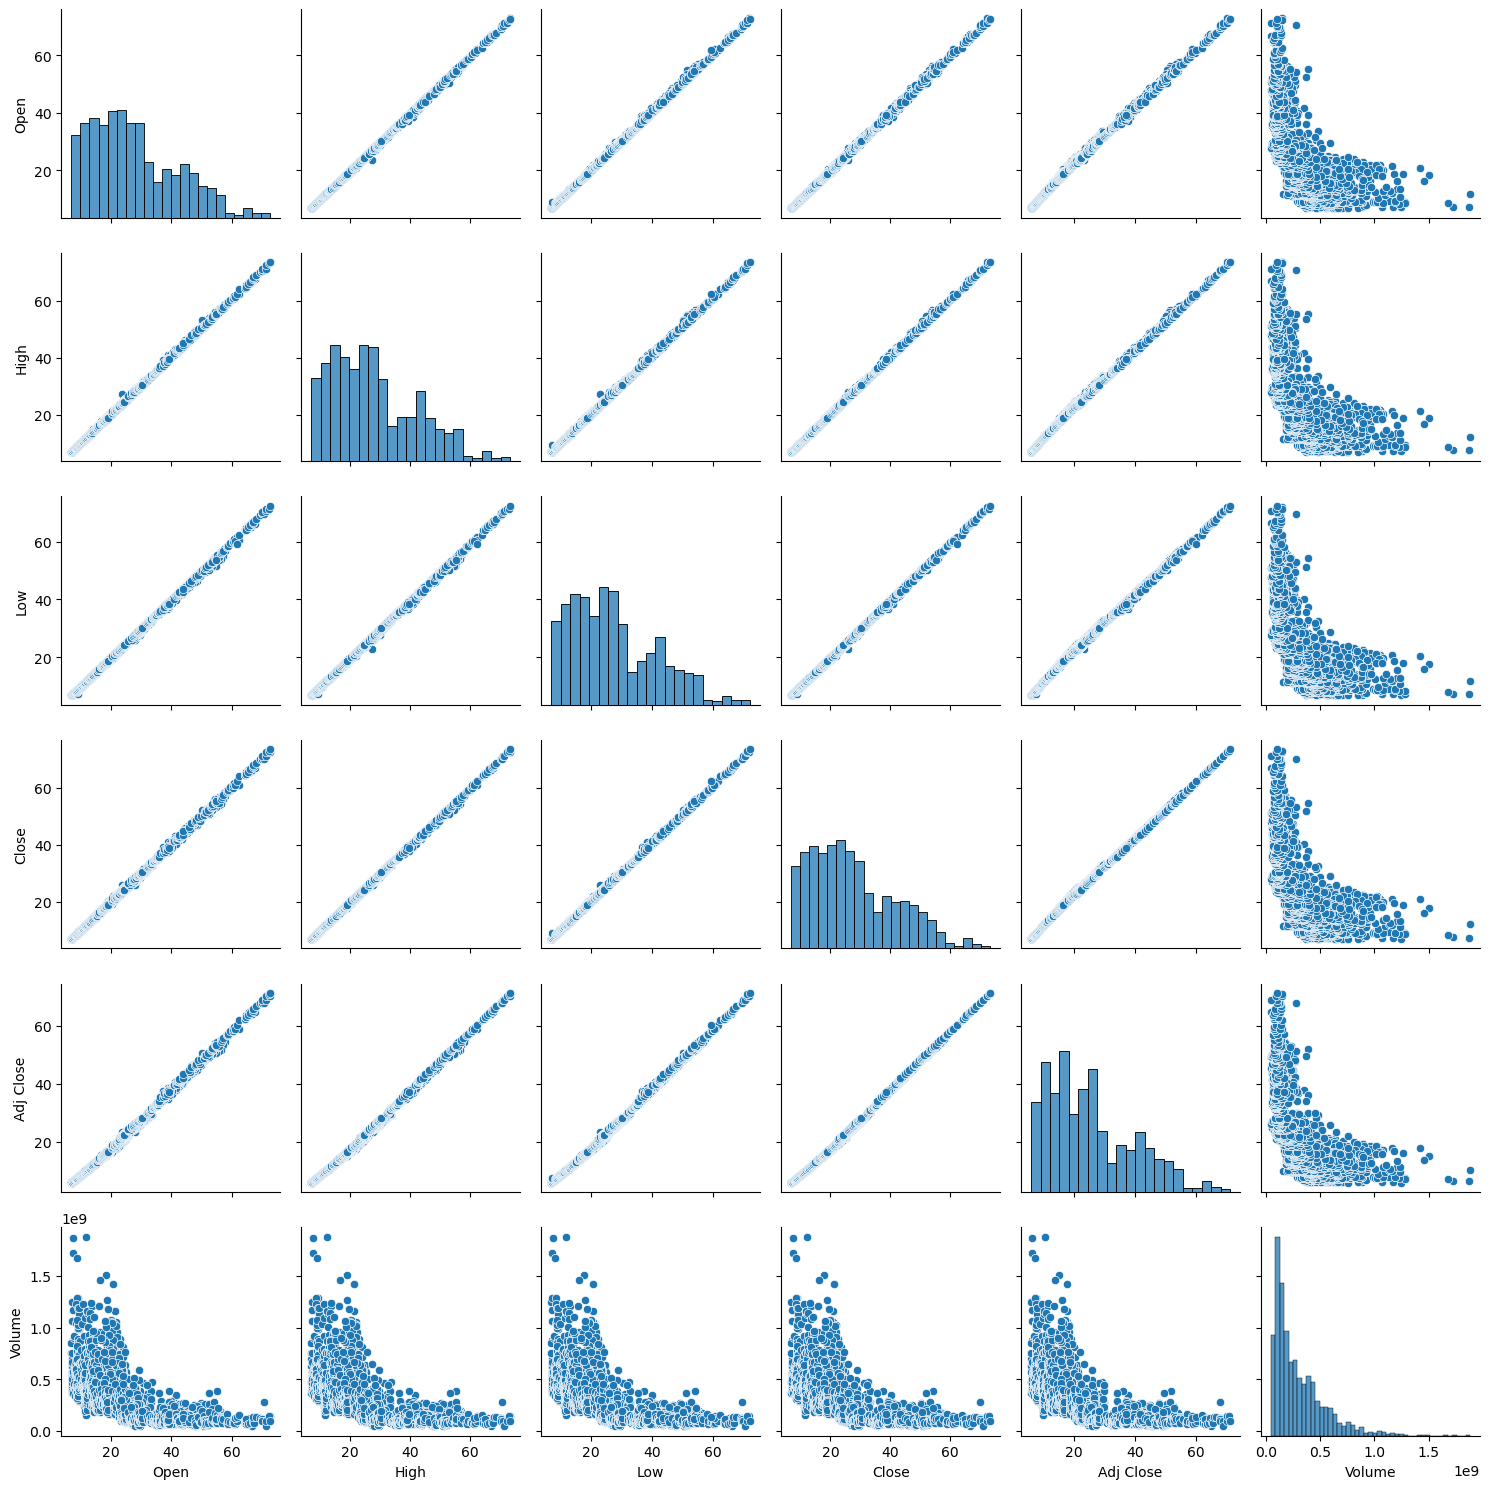

In [87]:
sns.pairplot(df)
plt.tight_layout()

In [92]:
X = df.drop(['Close'], axis=1)
y = df['Close']

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Open,High,Low,Adj Close,Volume
0,0.011412,0.009937,0.012051,0.010118,0.244222
1,0.012046,0.010522,0.012525,0.010289,0.303155
2,0.011927,0.010329,0.011163,0.008717,0.276055
3,0.010501,0.008594,0.010237,0.008538,0.235179
4,0.009716,0.008594,0.010243,0.009183,0.219097


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=False)

Acc = []

In [95]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
Date,,
2017-12-29,42.307499,42.430095
2018-01-02,43.064999,42.868481
2018-01-03,43.057499,43.460358
2018-01-04,43.257500,43.276288
2018-01-05,43.750000,43.726918


In [97]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.998444535028287


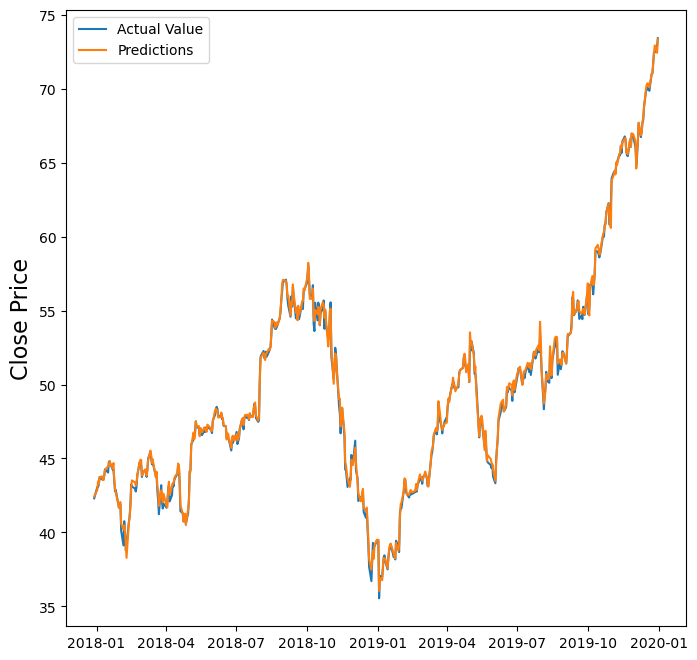

In [98]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [26]:
from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [28]:
model_2 = regressor(inp_dim=5)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 419.6842 - val_loss: 1174.1776
Epoch 2/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 416.4548 - val_loss: 1100.2994
Epoch 3/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 348.7340 - val_loss: 732.1871
Epoch 4/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 161.8246 - val_loss: 145.5148
Epoch 5/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.5010 - val_loss: 49.4847
Epoch 6/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.2701 - val_loss: 44.0092
Epoch 7/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.4957 - val_loss: 34.0011
Epoch 8/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5803 - val_loss: 26.9690
Epoch 9/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9241 - val_loss: 19.1456
Epoch 10/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0916 - val_loss: 14.4119
Epoch 11/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8155 - val_loss: 9.7433
Epoch 12/70
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [102]:
y_pred_2 = model_2.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [103]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
Date,,
2017-12-29,42.307499,42.416740
2018-01-02,43.064999,42.677738
2018-01-03,43.057499,43.128616
2018-01-04,43.257500,43.112858
2018-01-05,43.750000,43.459476


In [104]:
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9975210836234321


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
import numpy as np


In [123]:
# This is an example; modify thresholds as needed
# Convert predictions and actual values to classes based on a $1.00 threshold
predicted_classes = [1 if (pred - actual) > 4.00 else -1 if (pred - actual) < -4.00 else 0 for pred, actual in zip(y_pred_2.flatten(), y_test)]
y_test_classes = [1 if (actual - prev) > 4.00 else -1 if (actual - prev) < -4.00 else 0 for actual, prev in zip(y_test, y_test.shift(1))]


In [124]:
print("R2 Score of the predictions:", r2_score(y_test, y_pred_2))

# Classification metrics (if you decided to classify)
accuracy = accuracy_score(y_test_classes[1:], predicted_classes[1:])  # Skipping the first because of the shift
precision = precision_score(y_test_classes[1:], predicted_classes[1:], average='macro')
recall = recall_score(y_test_classes[1:], predicted_classes[1:], average='macro')
f1 = f1_score(y_test_classes[1:], predicted_classes[1:], average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

R2 Score of the predictions: 0.9975210836234321
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [1]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
stock_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473147,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3272 non-null   float64
 1   High       3272 non-null   float64
 2   Low        3272 non-null   float64
 3   Close      3272 non-null   float64
 4   Adj Close  3272 non-null   float64
 5   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [5]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,51.297746,51.869747,50.731996,51.321186,49.065501,2.562707e+08
std,47.328490,47.938843,46.732224,47.357062,47.433208,2.225648e+08
min,6.870357,7.000000,6.794643,6.858929,5.798900,3.519590e+07
25%,18.966697,19.121697,18.780179,18.967589,16.490456,1.023541e+08
50%,29.756250,29.981250,29.561250,29.815000,27.162601,1.666698e+08
75%,56.983748,57.309999,56.469999,56.777499,54.504438,3.456643e+08
max,182.630005,182.940002,179.119995,182.009995,179.481110,1.880998e+09


In [6]:
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Volatility'] = stock_data['Close'].rolling(window=20).std()

In [7]:
stock_data.fillna(method='ffill', inplace=True)
stock_data.dropna(inplace=True)

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'Volatility']])

In [9]:
def create_sequences(data, sequence_length=60):
    xs, ys = [], []
    for i in range(sequence_length, len(data)):
        xs.append(data[i-sequence_length:i])  
        ys.append(data[i, 3]) 
    return np.array(xs), np.array(ys)

In [10]:
X, y = create_sequences(scaled_data)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

In [12]:
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - loss: 0.0189
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 0.0018
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0015
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 0.0014
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0017
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.0015
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.0014
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 0.0012
Epoch 9/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 0.0011
Epoch 10/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 0.0013
Epoch 11/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.0011
Epoch 12/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 0.0011
Epoch 13/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 9.5576e-04
Epoch 14/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 8.2600e-04
Epoch 15/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss:

In [15]:
predicted_prices = model.predict(X)

99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step


In [16]:
dummy = np.zeros((predicted_prices.shape[0], 8)) 

dummy[:, 3] = predicted_prices.ravel() 


predicted_prices_transformed = scaler.inverse_transform(dummy)[:, 3]

In [18]:
actual_prices_dummy = np.zeros((y.shape[0], 8))
actual_prices_dummy[:, 3] = y.ravel()  
actual_prices_transformed = scaler.inverse_transform(actual_prices_dummy)[:, 3]

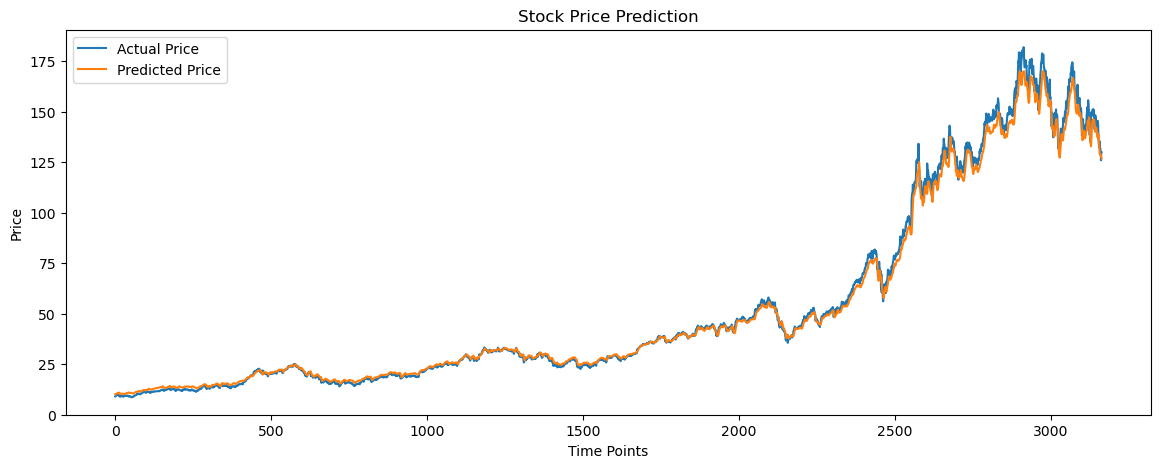

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(actual_prices_transformed, label='Actual Price')
plt.plot(predicted_prices_transformed, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time Points')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
new_data = yf.download('AAPL', start='2023-01-01', end='2024-05-01')

[*********************100%%**********************]  1 of 1 completed


In [21]:
new_data['SMA_20'] = new_data['Close'].rolling(window=20).mean()
new_data['SMA_50'] = new_data['Close'].rolling(window=50).mean()
new_data['Volatility'] = new_data['Close'].rolling(window=20).std()

In [22]:
new_data.fillna(method='ffill', inplace=True)
new_data.dropna(inplace=True)

In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_newdata = scaler.fit_transform(new_data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'Volatility']])

In [24]:
def create_sequences(data, sequence_length=60):
    xs, ys = [], []
    for i in range(sequence_length, len(data)):
        xs.append(data[i-sequence_length:i])  
        ys.append(data[i, 3]) 
    return np.array(xs), np.array(ys)

# Re-run sequence creation with adjusted length
X_new = create_sequences(scaled_newdata)

In [25]:
predicted_prices = model.predict(X_new)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [26]:
predicted_dummy = np.zeros((predicted_prices.shape[0], 8))
predicted_dummy[:, 3] = predicted_prices.ravel()

In [27]:
predicted_prices_transformed = scaler.inverse_transform(predicted_dummy)[:, 3]

In [28]:
actual_values = new_data['Close'].values[-len(predicted_prices):]

In [29]:
mae = np.mean(np.abs(predicted_prices_transformed - actual_values))
mape = np.mean(np.abs((actual_values - predicted_prices_transformed) / actual_values)) * 100

print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Error: 2.889871875073311
Mean Absolute Percentage Error: 1.5774354255442733%


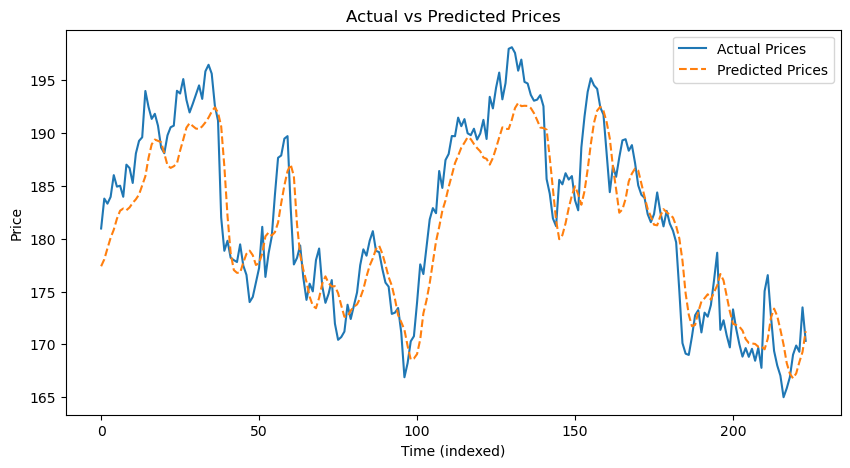

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(actual_values, label='Actual Prices')
plt.plot(predicted_prices_transformed, label='Predicted Prices', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time (indexed)')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
print("Predicted Prices:", predicted_prices_transformed)
print("Actual Prices:", actual_values) 
print("Length of Predicted Prices:", len(predicted_prices_transformed))
print("Length of Actual Prices:", len(actual_values))

Predicted Prices: [177.38858758 178.04282312 179.08170456 180.07545045 180.84818193
 181.88269585 182.64315309 182.8483917  182.69076285 182.95239468
 183.38693898 183.72343724 184.17635258 185.03480208 185.9022959
 187.63694199 188.91852753 189.37533437 189.24404782 189.12420181
 188.05426363 186.93290755 186.6943881  186.84861221 187.11985043
 188.32746778 189.38040919 190.49912432 190.92740242 190.65853352
 190.41792444 190.36167107 190.62356376 190.99932131 191.45135723
 192.01804599 192.41982043 191.9212747  190.61792954 186.83124969
 182.16037778 178.63271031 177.03263717 176.76736664 176.78301334
 177.7470149  178.56551931 178.86705319 178.43116958 177.50934797
 177.68782474 178.62386769 180.21829856 180.58075723 180.29166165
 180.60819947 181.51886292 183.36164554 185.0302974  186.38701831
 187.01531765 185.90848681 181.3495999  178.45608651 177.0567957
 175.90705341 174.50572407 173.65793788 173.41932162 174.405977
 175.76116901 176.43381054 175.79095369 175.47442393 175.50097

In [32]:
mape = np.mean(np.abs((actual_values - predicted_prices_transformed) / actual_values)) * 100
accuracy_like_score = 100 - mape

print(f"Predicted Prices: {predicted_prices_transformed}")
print(f"Actual Prices: {actual_values}")
print(f"Length of Predicted Prices: {len(predicted_prices_transformed)}")
print(f"Length of Actual Prices: {len(actual_values)}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Model 'Accuracy' (100% - MAPE): {accuracy_like_score}%")

Predicted Prices: [177.38858758 178.04282312 179.08170456 180.07545045 180.84818193
 181.88269585 182.64315309 182.8483917  182.69076285 182.95239468
 183.38693898 183.72343724 184.17635258 185.03480208 185.9022959
 187.63694199 188.91852753 189.37533437 189.24404782 189.12420181
 188.05426363 186.93290755 186.6943881  186.84861221 187.11985043
 188.32746778 189.38040919 190.49912432 190.92740242 190.65853352
 190.41792444 190.36167107 190.62356376 190.99932131 191.45135723
 192.01804599 192.41982043 191.9212747  190.61792954 186.83124969
 182.16037778 178.63271031 177.03263717 176.76736664 176.78301334
 177.7470149  178.56551931 178.86705319 178.43116958 177.50934797
 177.68782474 178.62386769 180.21829856 180.58075723 180.29166165
 180.60819947 181.51886292 183.36164554 185.0302974  186.38701831
 187.01531765 185.90848681 181.3495999  178.45608651 177.0567957
 175.90705341 174.50572407 173.65793788 173.41932162 174.405977
 175.76116901 176.43381054 175.79095369 175.47442393 175.50097